In [117]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [118]:
df = pd.read_csv(r"D:\PG-DAI\Data Analytics\Assignment 5\titanic.csv")

In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task
### Perform hypothesis test for survival, based on gender.

#### For hypothesis testing, the following are defined:

#### Null Hypothesis: Survival rate of male and female is same,
#### Alternate Hypothesis: Survival Rate of male and female are not the same.
#### The threshold value of  α  is assumed to be 0.05. Assuming Null Hypothesis is true.

In [121]:
#Total survived
sum(df.Survived)


342

In [122]:
# Percentage of people survived
sum(df.Survived)/len(df)*100

38.38383838383838

In [123]:
#Number of survivors based on gender
table = pd.crosstab(df['Survived'],df['Sex'])
table

Sex,female,male
Survived,,
0,81,468
1,233,109


In [124]:
#Proportions of survivors based on Gender
df.groupby('Sex').Survived.mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

We will be using the Two Sample Z-Test Proportion test here.



<BarContainer object of 2 artists>

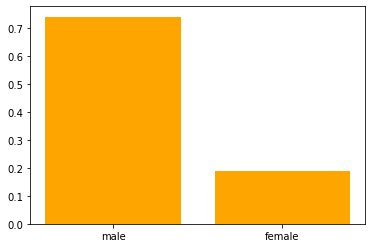

In [125]:
import matplotlib.pyplot as plt

plt.bar(df.Sex.unique(),df.groupby('Sex').Survived.mean(), color='orange')


In [126]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [127]:
# females = df[df["Sex"] == 'female']
# male = df[df["Sex"] == 'male']

In [128]:
h1_prop= df['Sex'].value_counts()['male']/len(df)

In [129]:
h0_prop= df['Sex'].value_counts()['female']/len(df)

In [130]:
sigma_prop = np.sqrt((h0_prop * (1 - h0_prop))/len(df))
sigma_prop

0.016004281240588846

In [131]:
z = (h1_prop - h0_prop)/sigma_prop
z

18.443437565445343

In [132]:
p_val = (1-stats.norm.cdf(z))*2       # pval<alpha
p_val

0.0

In [136]:
# male["Survived"].sum()

Since the p-value is smaller than alpha, we reject the null hypothesis.

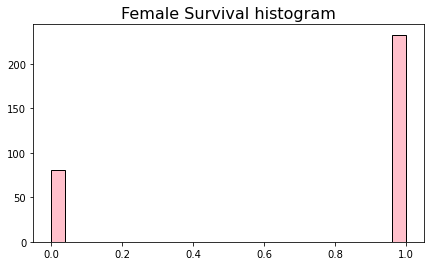

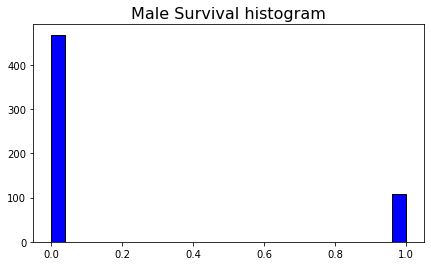